In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.font_manager as fm
import matplotlib as mpl

In [23]:
path = '/Library/Fonts/NanumBarunpenRegular.otf'
fontprop = fm.FontProperties(fname=path, size=18)

In [24]:
# 데이터 불러오기
data = pd.read_csv('OBS_ASOS_DD_20210104225316.csv', encoding = 'cp949')  # 2020-01-01~2010-01-01
data1 = pd.read_csv('OBS_ASOS_DD_20210104225407.csv', encoding = 'cp949') # 2010-01-02~2020-01-02
data2 = pd.read_csv('OBS_ASOS_DD_20210104225442.csv', encoding = 'cp949') # 2020-01-03~2021-01-03

data = pd.concat([data,data1,data2],axis=0).reset_index().drop('index',axis=1)

In [25]:
print('데이터 개수 =', len(data))
print('데이터 컬럼 개수 =', len(data.columns))

데이터 개수 = 7674
데이터 컬럼 개수 = 62


In [26]:
data.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온

62개의 데이터 컬럼명을 확인해 보았다.  
이 많은 변수들을 우리가 사용할 수 있는지 데이터 품질을 살펴보려고 한다.

In [27]:
# 결측이 있는 변수만 출력
for i,j in zip(data.columns,data.isna().sum()):
    if j>0:
        print(i,j)

최고기온(°C) 1
최고기온 시각(hhmi) 1
강수 계속시간(hr) 4710
10분 최다 강수량(mm) 5781
10분 최다강수량 시각(hhmi) 6288
1시간 최다강수량(mm) 5781
1시간 최다 강수량 시각(hhmi) 6277
일강수량(mm) 4709
최대 순간 풍속(m/s) 2
최대 순간 풍속 풍향(16방위) 2
최대 순간풍속 시각(hhmi) 2
최대 풍속(m/s) 2
최대 풍속 풍향(16방위) 2
최대 풍속 시각(hhmi) 2
평균 풍속(m/s) 3
풍정합(100m) 3
최다풍향(16방위) 5
최소 상대습도(%) 1
최소 상대습도 시각(hhmi) 1
평균 현지기압(hPa) 1
최고 해면기압(hPa) 1
최고 해면기압 시각(hhmi) 1
최저 해면기압(hPa) 2
최저 해면기압 시각(hhmi) 2
평균 해면기압(hPa) 1
합계 일조시간(hr) 12
1시간 최다일사 시각(hhmi) 24
1시간 최다일사량(MJ/m2) 23
합계 일사량(MJ/m2) 26
일 최심신적설(cm) 7412
일 최심신적설 시각(hhmi) 7419
일 최심적설(cm) 7155
일 최심적설 시각(hhmi) 7160
합계 3시간 신적설(cm) 7412
평균 중하층운량(1/10) 21
평균 지면온도(°C) 1
최저 초상온도(°C) 3
평균 5cm 지중온도(°C) 9
평균 10cm 지중온도(°C) 9
평균 20cm 지중온도(°C) 10
평균 30cm 지중온도(°C) 28
0.5m 지중온도(°C) 8
1.0m 지중온도(°C) 8
1.5m 지중온도(°C) 9
3.0m 지중온도(°C) 11
5.0m 지중온도(°C) 6
합계 대형증발량(mm) 2491
합계 소형증발량(mm) 6
9-9강수(mm) 4678
기사 2118
안개 계속시간(hr) 7512


In [28]:
# 결측비율이 높은 변수 출력
for i,j in zip(data.columns,data.isna().sum()/len(data)):
    if j>0.5:
        print(i,j)

강수 계속시간(hr) 0.6137607505863957
10분 최다 강수량(mm) 0.753322908522283
10분 최다강수량 시각(hhmi) 0.8193901485535575
1시간 최다강수량(mm) 0.753322908522283
1시간 최다 강수량 시각(hhmi) 0.8179567370341413
일강수량(mm) 0.6136304404482669
일 최심신적설(cm) 0.9658587438102685
일 최심신적설 시각(hhmi) 0.9667709147771697
일 최심적설(cm) 0.9323690383111806
일 최심적설 시각(hhmi) 0.9330205890018244
합계 3시간 신적설(cm) 0.9658587438102685
9-9강수(mm) 0.6095908261662757
안개 계속시간(hr) 0.9788897576231431


업무를 통해 ASOS데이터를 다룬 적이 있어 강수와 적설량의 결측원인을 알고 있다  
강수, 적설량이 0인 경우 결측으로 표시된다  
따라서 강수와 적설의 결측은 0으로 채우면 된다.  

안개 계속시간 증발량도 같은 이유일 것으로 추측된다.  
따라서 안개 계속시간, 증발량의 결측도 0으로 채운다.

In [29]:
rain_col = [i for i in data.columns if '강수' in i]
snow_col = [i for i in data.columns if '적설' in i]

data[rain_col+snow_col] = data[rain_col+snow_col].fillna(0)
data[['안개 계속시간(hr)','합계 대형증발량(mm)','합계 소형증발량(mm)']] = data[['안개 계속시간(hr)','합계 대형증발량(mm)','합계 소형증발량(mm)']].fillna(0)

강수와 적설, 안개 계속시간의 결측을 0으로 채우고 난 후 다시 결측이 있는 변수를 출력해보면 다음과 같이 나온다.
나머지 결측은 시계열 그래프 확인 후 채우도록 한다.

In [30]:
# 결측이 있는 변수만 출력
for i,j in zip(data.columns,data.isna().sum()):
    if j>0:
        print(i,j)

최고기온(°C) 1
최고기온 시각(hhmi) 1
최대 순간 풍속(m/s) 2
최대 순간 풍속 풍향(16방위) 2
최대 순간풍속 시각(hhmi) 2
최대 풍속(m/s) 2
최대 풍속 풍향(16방위) 2
최대 풍속 시각(hhmi) 2
평균 풍속(m/s) 3
풍정합(100m) 3
최다풍향(16방위) 5
최소 상대습도(%) 1
최소 상대습도 시각(hhmi) 1
평균 현지기압(hPa) 1
최고 해면기압(hPa) 1
최고 해면기압 시각(hhmi) 1
최저 해면기압(hPa) 2
최저 해면기압 시각(hhmi) 2
평균 해면기압(hPa) 1
합계 일조시간(hr) 12
1시간 최다일사 시각(hhmi) 24
1시간 최다일사량(MJ/m2) 23
합계 일사량(MJ/m2) 26
평균 중하층운량(1/10) 21
평균 지면온도(°C) 1
최저 초상온도(°C) 3
평균 5cm 지중온도(°C) 9
평균 10cm 지중온도(°C) 9
평균 20cm 지중온도(°C) 10
평균 30cm 지중온도(°C) 28
0.5m 지중온도(°C) 8
1.0m 지중온도(°C) 8
1.5m 지중온도(°C) 9
3.0m 지중온도(°C) 11
5.0m 지중온도(°C) 6
기사 2118


이렇게 데이터프레임을 열어보면 특이한 컬럼이 있다.  
'기사'라는 컬럼인데 이 컬럼은 단순히 수치로 기록되어 있지 않고 글자가 섞여 있다.  
이 컬럼은 제외하고 분석에 들어가겠다  
최저기온 시각, 최고기온 시각 등 최저기온이 측정된 시각, 각 특정 데이터가 측정된 시각들도 변수로 포함되어 있다.  
이런 변수들은 기온, 강수량 예측과 상관관계가 낮을 것이라 생각이 들어 제외하고 분석에 들어가겠다.  
추가로 강수 계속시간(hr),10분 최다 강수량(mm)도 제거한다.  
(그다음 단계로 openAPI를 이용해 실시간으로 데이터를 불러 다음날 평균기온을 예측할 것이다.  
그런데 openAPI로 데이터를 불렀을때, 이 두 변수는 포함이 안된다.  
학습에 사용된 변수가 추론에는 없으면 예측이 제대로 되지 않는다.  
그러므로 학습에 포함시키지 않는다.)

In [32]:
data = data.drop(['기사','강수 계속시간(hr)','10분 최다 강수량(mm)'],axis=1)

time_col=[i for i in data.columns if '시각' in i]
print(time_col)

['최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '10분 최다강수량 시각(hhmi)', '1시간 최다 강수량 시각(hhmi)', '최대 순간풍속 시각(hhmi)', '최대 풍속 시각(hhmi)', '최소 상대습도 시각(hhmi)', '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '1시간 최다일사 시각(hhmi)', '일 최심신적설 시각(hhmi)', '일 최심적설 시각(hhmi)']


In [33]:
data = data.drop(time_col, axis=1)

In [34]:
data.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),...,평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,108,서울,2000-01-01,5.5,1.8,9.9,0.0,0.0,7.4,50.0,...,1.3,3.5,6.7,10.0,14.6,17.5,0.0,0.9,4.0,0.0
1,108,서울,2000-01-02,4.2,-0.9,6.9,0.0,6.0,11.8,250.0,...,1.4,3.6,6.7,9.7,14.5,17.5,0.0,0.8,2.0,0.0
2,108,서울,2000-01-03,-2.2,-4.6,0.1,0.0,0.0,8.1,290.0,...,1.3,3.3,6.2,9.5,14.5,17.8,0.0,0.8,0.0,0.0
3,108,서울,2000-01-04,0.3,-4.3,4.3,0.0,0.0,4.5,50.0,...,1.3,3.3,6.3,9.5,14.5,17.3,0.0,0.7,3.7,0.0
4,108,서울,2000-01-05,2.8,0.1,4.6,0.0,18.4,9.1,70.0,...,1.3,3.3,6.0,9.5,14.5,17.5,0.0,1.7,24.5,0.0


현재 서울 데이터만 분석하고 있으므로 지점과 지점명 또한 제거한다.  

In [35]:
data = data.drop(['지점','지점명'], axis=1)

1) feature selection을 진행하지 않고 모든 변수를 이용하여 기온, 강수량 예측을 진행해보겠다  
2) feature selection을 하고 싶다!  >  데이터 시각화 & 상관관계 분석  

시간이 지남에 따라 순차적으로 측정한 데이터로 모두 시계열성을 같는다 생각하여 전처리는 시간에 대해 정렬 후 선형보간을 진행한다.

In [36]:
data = data.sort_values('일시').interpolate(method='linear')

In [37]:
# 보간 후 결측치 없음을 확인
print('결측치 개수 =',data.isna().sum().sum())

결측치 개수 = 0


일반적인 모델을 구현하기 위해 데이터셋을 학습/검증/테스트 셋으로 분리하여 사용한다  
- cross validation 종류 정리 : https://juni5184.tistory.com/14  
- hold-out validation 설명 : https://bskyvision.com/720  
일반적으로 많이 쓰이는 hold-out validation 사용  
학습 : 검증 : 테스트 = 6:2:2 로 나눈다  

데이터셋을 분리하기 전 라벨값을 만들자  
다음날의 평균 기온을 예측하고 싶다!  
다음날 평균 기온을 Y값으로 지정한다  

In [38]:
data['Y'] = data['평균기온(°C)'].shift(-1)
data = data.dropna()

In [39]:
train = data[data['일시']<'2013-01-01']
valid = data[data['일시']>='2013-01-01']
valid = valid[valid['일시']<'2017-01-01']
test = data[data['일시']>='2017-01-01']
print(' train set:',len(train),'개\n',
      'valid set:',len(valid),'개\n',
      'test set',len(test),'개')

# X와 Y분리

trainX,trainY = train.drop(['일시','Y'],axis=1), train['Y']
validX,validY = valid.drop(['일시','Y'],axis=1), valid['Y']
testX,testY = test.drop(['일시','Y'],axis=1), test['Y']

 train set: 4749 개
 valid set: 1461 개
 test set 1463 개


In [40]:
trainX.columns

Index(['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '1시간 최다강수량(mm)', '일강수량(mm)',
       '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)',
       '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)',
       '최저 해면기압(hPa)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조시간(hr)',
       '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)',
       '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속시간(hr)'],
      dtype='object')

1) 스케일링 진행x  
2) 스케일링 진행o  
참고하자 : https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling  

먼저 스케일링없이 진행  
바로 모델 설계로 넘어간다  
텐서플로우, 케라스를 사용해서 모델을 구현한다  
- 프레임워크 선택  
1) 케라스  
2) 텐서플로우  

- 모델 유형 선택  
1) DNN  
2) CNN  
3) RNN  
4) LSTM  

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [44]:
inputs_1 = tf.keras.Input(shape=44)
dense = tf.keras.layers.Dense(50)(inputs_1)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
dense = tf.keras.layers.Dense(50)(dense)
output = tf.keras.layers.Dense(1)(dense)

model = tf.keras.Model(inputs=[inputs_1], outputs=output)

optimizer = tf.keras.optimizers.Adam(lr = 0.001)

model.compile(loss='mse', optimizer=optimizer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 44)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2250      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 9,951
Trainable params: 9,951
Non-trainable params: 0
_________________________________________________________

Train on 4749 samples, validate on 1461 samples
Epoch 1/200
4736/4749 [============================>.] - ETA: 0s - loss: 434.8401
Epoch 00001: val_loss improved from inf to 73.02868, saving model to checkpoint.keras
4749/4749 [==============================] - 5s 1ms/sample - loss: 433.8448 - val_loss: 73.0287
Epoch 2/200
4694/4749 [============================>.] - ETA: 0s - loss: 41.9409
Epoch 00002: val_loss improved from 73.02868 to 9.34626, saving model to checkpoint.keras
4749/4749 [==============================] - 5s 999us/sample - loss: 41.6423 - val_loss: 9.3463
Epoch 3/200
4680/4749 [============================>.] - ETA: 0s - loss: 16.4975
Epoch 00003: val_loss did not improve from 9.34626
4749/4749 [==============================] - 4s 865us/sample - loss: 16.3930 - val_loss: 10.5608
Epoch 4/200
4694/4749 [============================>.] - ETA: 0s - loss: 26.3035
Epoch 00004: val_loss improved from 9.34626 to 6.41527, saving model to checkpoint.keras

Epoch 00004: ReduceLR

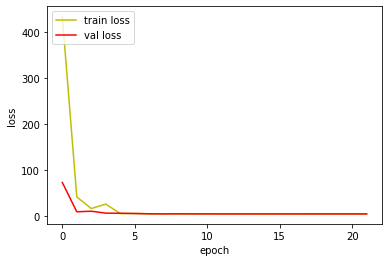

In [45]:
path_checkpoint = 'checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss', patience=10,verbose=0)


callback_reduce_lr = ReduceLROnPlateau(monitor='loss',
                                       factor=0.1,
                                       patience=1,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_reduce_lr]
hist = model.fit(trainX,trainY, validation_data=(validX, validY), 
                 epochs = 200, batch_size=1, callbacks=callbacks, verbose=1)

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

테스트 데이터를 이용하여 모델이 잘 학습되었는지 확인한다.  
시계열 그래프 그려서 비교  
RMSE 계산

In [66]:
test['일시'].iloc[0]

'2017-01-01'

In [73]:
time = pd.to_datetime(test['일시'])

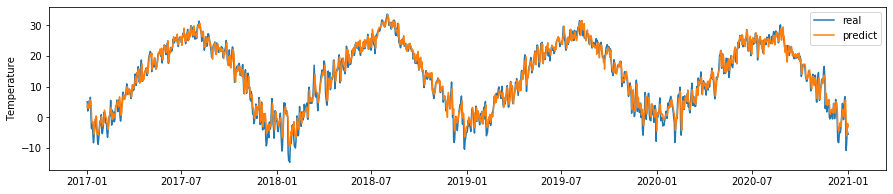

In [74]:
pred = model.predict(testX)
plt.figure(figsize = (15,3))
plt.plot(time,testY.reset_index()['Y'])
plt.plot(time,pred)
plt.ylabel('Temperature')
plt.legend(['real','predict'])

In [47]:
print('RMSE = ',round((((testY.values-[i[0] for i in pred])**2).sum()/len(pred))**0.5,4))

RMSE =  2.1438


학습한 모델을 활용할 수 있도록 저장한다  

In [48]:
model.save('temp_1day_prediction.h5')